當前工作目錄 ==> D:\0_sdr\Color-wheel
the python version is 3.9.1


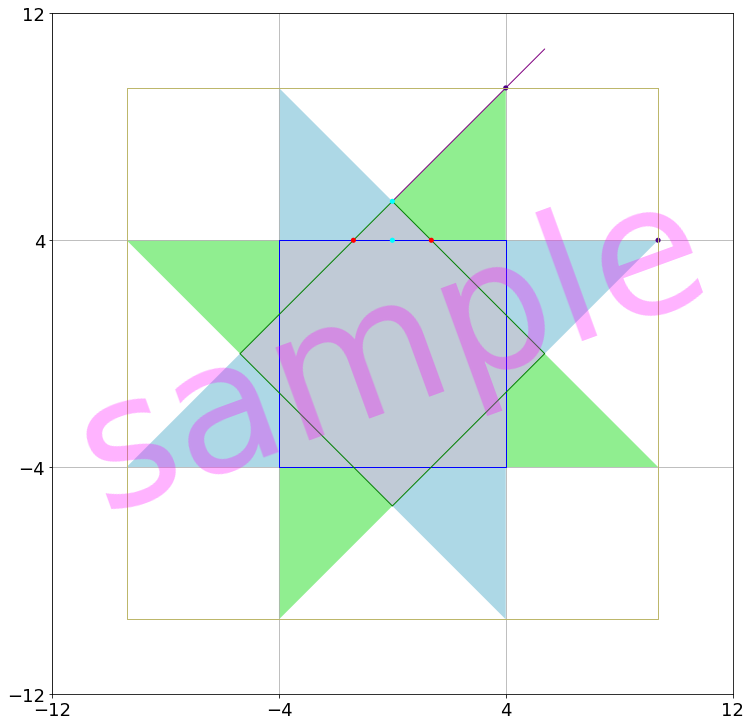

In [33]:
# (home)/Color-Wheel/
# Color-wheel-1
# 2021-10-15
#
# python 3.8.10
# run on replit.com
# run on mybinder.org
#
# python 3.9.1
# run on miniconda 3 JupyterLab
#
# 要執行本程式, 請按上方run▶
#
# to fix matplotlib warning
import os
path = os.getcwd()
print('當前工作目錄 ==>', path)
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
#
from platform import python_version
print('the python version is', python_version())
#
import numpy as np
# 載入繪圖模組 pyplot, 重新命名為 plot
import matplotlib.pyplot as plt
#
from shapely import affinity
from shapely.geometry  import LineString, Point, Polygon
#
# ------------------------------------------------------
#
def set_graphic_area(width,height) :
        
    cm2inch = 1/2.54    # inch per cm
    #
    # define graphic area
    #
    left_margin = 1.0   # cm
    right_margin = 1.0  # cm
    #
    figure_width  = width  # cm , from xmin to xmax
    figure_height = height # cm , from ymin to ymax
    #
    top_margin = 1.0    # cm
    bottom_margin = 1.0 # cm
    #
    box_width = left_margin + figure_width + right_margin   # cm
    box_height = top_margin + figure_height + bottom_margin # cm
    #
    top_value    = 1.0 - top_margin / box_height
    bottom_value = bottom_margin / box_height
    left_value   = left_margin / box_width
    right_value  = 1.0 - right_margin / box_width
    #
    return (box_width*cm2inch,box_height*cm2inch,top_value,bottom_value,left_value,right_value,width)
#
# end of def
#
def shapely_Arc(cxy, r, start_angle, end_angle) :

    numsegments = 720
    # The coordinates of the arc
    theta = np.radians(np.linspace(start_angle, end_angle, numsegments))
    x = cxy[0] + r * np.cos(theta)
    y = cxy[1] + r * np.sin(theta)
    Arc = LineString(np.column_stack([x, y]))
    return Arc
#
# end of def
#
def motif_line(LS, MYcolor, ZORDER, LINEWIDTH) :
    #
    xs, ys = LS.xy
    ax.plot(xs, ys, color=MYcolor, alpha=1.0, linewidth=LINEWIDTH, solid_capstyle='round', zorder=ZORDER)
    return
#
def motif_fill(LS, color, ZORDER, Alpha) :
    #
    xs, ys = LS.xy
    ax.fill(xs, ys, alpha=Alpha, closed=True, edgecolor=None, facecolor=color, fill=True, zorder=ZORDER)
    return
#
# ------------------------------------------------------------------------------------------------
#
# tup7 is type of Tuple, have 7 indexed value
#
r0 = 4
tup7 = set_graphic_area(6*r0, 6*r0)  
fig = plt.figure(figsize=(tup7[0], tup7[1])) # 呼叫 pyplot.figure(), 建立一個圖表物件, 並成為目前圖表物件
ax = fig.add_subplot(1,1,1)   # 圖表的繪圖區域被分為1個子圖, 1 row, 1 column, plot to index 1
fig.subplots_adjust(
                top    = tup7[2] ,
                bottom = tup7[3] ,
                left   = tup7[4] ,
                right  = tup7[5] ,
                )
#
plt.xlim(-tup7[6]/2, tup7[6]/2)    # 設定X軸的顯示範圍, from xmin to xmax
plt.ylim(-tup7[6]/2, tup7[6]/2)    # 設定Y軸的顯示範圍, from ymin to ymax
#
xvalues = [-3*r0,-r0,r0,3*r0]
yvalues = [-3*r0,-r0,r0,3*r0]
plt.xticks(xvalues)
plt.yticks(yvalues)
plt.tick_params(labelsize=18)
#
plt.grid(True)
ax.set_axis_on()    # will turn on  grid line
# ax.set_axis_off() # will turn off grid line
#
# get current axes, set X,Y same ratio & scale  
plt.gca().set_aspect('equal', adjustable='box')
#
ax.text(0.5, 0.5, 'sample', transform=ax.transAxes,
        fontsize=180, color='magenta', alpha=0.3,
        ha='center', va='center', rotation='20', zorder=20)
#
plt.savefig("./png/01.png",format="png",dpi=300, facecolor='white')
#
square_1_xy = [(r0,r0),(-r0,r0),(-r0,-r0),(r0,-r0),(r0,r0)]
square_1    = LineString(square_1_xy)
square_2_t  = affinity.rotate(square_1, 45, (0,0))
square_2    = affinity.scale(square_2_t, 0.95, 0.95, 0, (0,0))
#
color_1 = (179/255,202/255,180/255)
color_2 = (192/255,202/255,214/255)
#
motif_fill(square_1, color_2, 5, 1)
motif_fill(square_2, color_2, 5, 1)
motif_line(square_1, 'blue',  10, 1.0)
motif_line(square_2, 'green', 10, 1.0)
#
plt.savefig("./png/02.png",format="png",dpi=300, facecolor='white')
#
line_1_xy = [(r0,r0),(-r0,r0)]
line_1    = LineString(line_1_xy)
line_2_t  = affinity.rotate(line_1, 45, (0,0))
line_2    = affinity.scale(line_2_t, 0.95, 0.95, 0, (0,0))
line_3_xy = [(r0,r0), (r0,3*r0)]
line_3    = LineString(line_3_xy)
#
its_L    = line_1.intersection(line_2)
its_L_xy = ( its_L.x, its_L.y)
its_R_xy = (-its_L.x, its_L.y)
#
cir_L = shapely_Arc(its_L_xy, 0.09, 0, 360)
cir_R = shapely_Arc(its_R_xy, 0.09, 0, 360)
motif_fill(cir_L, 'red', 15, 1)
motif_fill(cir_R, 'red', 15, 1)
#
its_M1_xy = (0, r0)
its_M2    = affinity.rotate(its_L,-90,its_M1_xy)
its_M2_xy = (its_M2.x, its_M2.y)
#
cir_M1 = shapely_Arc(its_M1_xy, 0.09, 0, 360)
cir_M2 = shapely_Arc(its_M2_xy, 0.09, 0, 360)
motif_fill(cir_M1, 'cyan', 15, 1)
motif_fill(cir_M2, 'cyan', 15, 1)
#
plt.savefig("./png/03.png",format="png",dpi=300, facecolor='white')
#
line_2_r180 = affinity.rotate(line_2, 180, its_M2_xy)
motif_line(line_2_r180, 'purple', 10, 1.0)
#
plt.savefig("./png/04.png",format="png",dpi=300, facecolor='white')
#
its_RU      = line_2_r180.intersection(line_3)
its_RU_1_xy = (its_RU.x, its_RU.y)
its_RU_2_xy = (its_RU.y, r0)
cir_RU_1    = shapely_Arc(its_RU_1_xy, 0.09, 0, 360)
cir_RU_2    = shapely_Arc(its_RU_2_xy, 0.09, 0, 360)
motif_fill(cir_RU_1, 'indigo', 15, 1)
motif_fill(cir_RU_2, 'indigo', 15, 1)
#
plt.savefig("./png/05.png",format="png",dpi=300, facecolor='white')
#
rx = its_RU.y
ry = its_RU.y
rectangle_xy = [(rx,ry), (-rx,ry), (-rx,-ry), (rx,-ry), (rx,ry)]
rectangle    = LineString(rectangle_xy)
motif_line(rectangle, 'darkkhaki', 15, 1.0)
#
plt.savefig("./png/06.png",format="png",dpi=300, facecolor='white')
#
# define reflection matrix for shapely
#
reflect_about_Xaxis  = [ 1, 0, 0,-1, 0,0]   # Affine2D(np.array([[ 1, 0, 0], [0,-1, 0], [0, 0, 1]]))
reflect_about_Yaxis  = [-1, 0, 0, 1, 0,0]   # Affine2D(np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 1]]))
reflect_about_Origin = [-1, 0, 0,-1, 0,0]   # Affine2D(np.array([[-1, 0, 0], [0,-1, 0], [0, 0, 1]]))
#
# LU_leg_1 = affinity.affine_transform(RU_leg_1, reflect_about_Yaxis)
asterism_RU_xy = [its_M2_xy, its_RU_1_xy, (r0,r0), its_R_xy, its_M2_xy]
asterism_RU    = Polygon(asterism_RU_xy)
asterism_LU    = affinity.affine_transform(asterism_RU, reflect_about_Yaxis)
xs1, ys1 = asterism_RU.exterior.coords.xy
xs2, ys2 = asterism_LU.exterior.coords.xy
plt.fill(xs1, ys1, 'lightgreen')
plt.fill(xs2, ys2, 'lightblue')
#
plt.savefig("./png/07.png",format="png",dpi=300, facecolor='white')
#
for i in (1,2,3) :
    r_asterism_RU = affinity.rotate(asterism_RU, i*90, (0,0))
    r_asterism_LU = affinity.rotate(asterism_LU, i*90, (0,0))
    xs1, ys1 = r_asterism_RU.exterior.coords.xy
    xs2, ys2 = r_asterism_LU.exterior.coords.xy
    plt.fill(xs1, ys1, 'lightgreen')
    plt.fill(xs2, ys2, 'lightblue')
# end for
#
plt.savefig("./png/08.png",format="png",dpi=300, facecolor='white')
#